<a href="https://colab.research.google.com/github/sagaravatade/PyTorch-Tutorials/blob/main/ANN_Fashion_MNIST_PyTorch_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device : {device}")

Using device : cuda


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sagaravatade/DATASETS/refs/heads/main/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


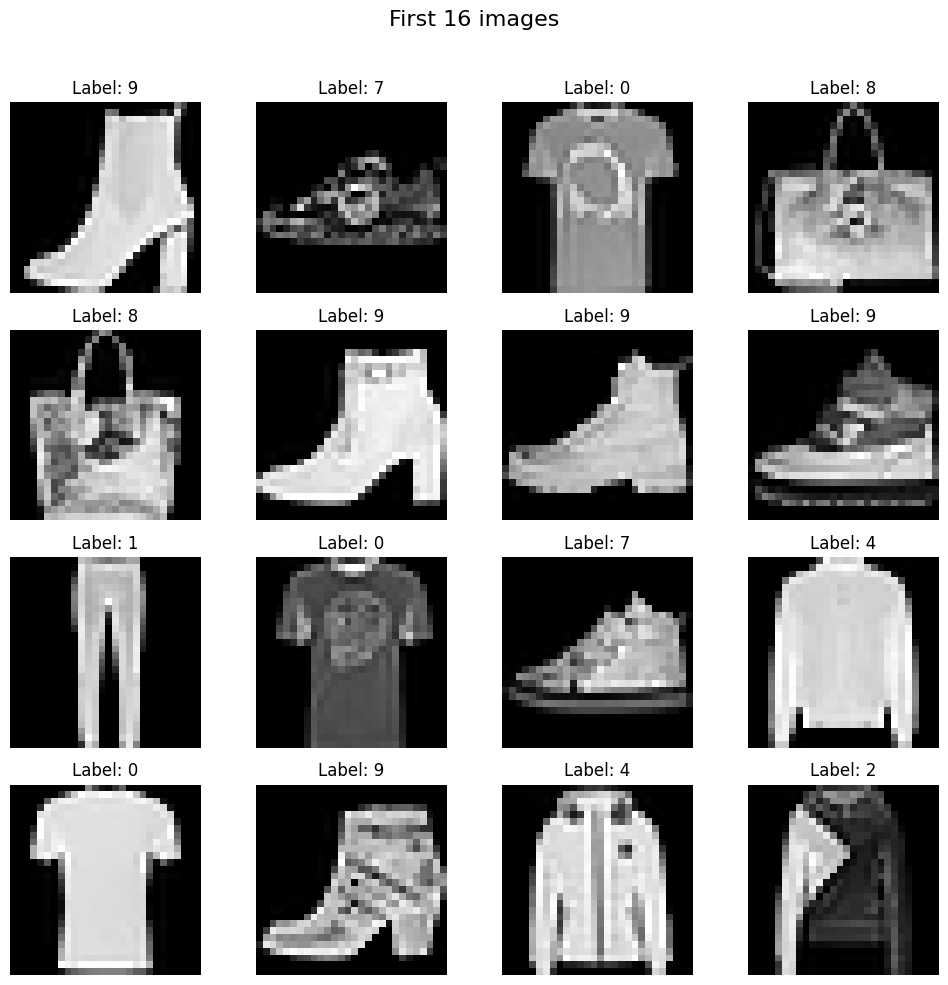

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig,plt.suptitle("First 16 images",fontsize=16)

# plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28) # Reshape to 28X28
  ax.imshow(img,cmap="gray") # display in grayscale
  ax.axis("off") # remove axis for a cleaner look
  ax.set_title(f"Label: {df.iloc[i,0]}") # set title with the label

plt.tight_layout(rect=[0,0,1,0.96]) # adjust layout to fit the title
plt.show()

In [ ]:
# train test split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Scaling the features
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# Create CustomDataset Class

class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features=torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]

In [ ]:
# Create train_dataset object
train_dataset=CustomDataset(X_train,y_train)

In [ ]:
len(train_dataset)

4800

In [ ]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
# Create test_dataset object
test_dataset=CustomDataset(X_test,y_test)

In [ ]:
#Create train and test loader
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
# Define NN class

class MyNN(nn.Module):
  def __init__(self,num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
    )

  def forward(self,x):
      return self.model(x)

In [ ]:
# Set learning rate and epoch
epoch=100
learning_rate=0.1

In [ ]:
# Instatiate the model
model=MyNN(X_train.shape[1])
model = model.to(device)

# loss function
criterion=nn.CrossEntropyLoss()

# Optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [ ]:
# Training loop

for epoch in range(epoch):

  total_epoch_loss = 0

  for batch_features,batch_labels in train_loader:

    #move data to gpu
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    # Forward pass
    outputs=model(batch_features)

    # Calculate loss
    loss=criterion(outputs,batch_labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()

    # update Parameters(gradients)
    optimizer.step()

    # Update total epoch loss
    total_epoch_loss+=loss.item()

  print(f"Epoch {epoch+1}/{epoch}, Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/0, Loss: 0.9732997973759969
Epoch 2/1, Loss: 0.6825804388523102
Epoch 3/2, Loss: 0.6201567999521891
Epoch 4/3, Loss: 0.5779790512720744
Epoch 5/4, Loss: 0.530347839097182
Epoch 6/5, Loss: 0.5128572115302086
Epoch 7/6, Loss: 0.4880304405093193
Epoch 8/7, Loss: 0.47508808652559914
Epoch 9/8, Loss: 0.43279404322306314
Epoch 10/9, Loss: 0.4288519724210103
Epoch 11/10, Loss: 0.40688627074162165
Epoch 12/11, Loss: 0.39910156567891436
Epoch 13/12, Loss: 0.4055436498920123
Epoch 14/13, Loss: 0.3750319378574689
Epoch 15/14, Loss: 0.36728809371590615
Epoch 16/15, Loss: 0.3442665846645832
Epoch 17/16, Loss: 0.34004225184520087
Epoch 18/17, Loss: 0.3458041932185491
Epoch 19/18, Loss: 0.32335501169164976
Epoch 20/19, Loss: 0.31397701064745587
Epoch 21/20, Loss: 0.32776431312163673
Epoch 22/21, Loss: 0.3183260894815127
Epoch 23/22, Loss: 0.2904988715052605
Epoch 24/23, Loss: 0.2964910240719716
Epoch 25/24, Loss: 0.2934210211038589
Epoch 26/25, Loss: 0.2704896395901839
Epoch 27/26, Loss: 0.27

In [ ]:
# set model to eval mode
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
 # evaluation code

total=0

correct=0

with torch.no_grad():

  for batch_features,batch_labels in test_loader:

    #move data to gpu
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    # Forward pass
    outputs=model(batch_features)

    _, predicted = torch.max(outputs,1)

    total=total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy: {100*correct/total}")

Accuracy: 83.66666666666667


In [ ]:
 # evaluation code

total=0

correct=0

with torch.no_grad():

  for batch_features,batch_labels in train_loader:

    #move data to gpu
    batch_features=batch_features.to(device)
    batch_labels=batch_labels.to(device)

    # Forward pass
    outputs=model(batch_features)

    _, predicted = torch.max(outputs,1)

    total=total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy: {100*correct/total}")

Accuracy: 99.10416666666667
